In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from ast import literal_eval
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import sparse as sp_sparse
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [304]:
from sklearn.model_selection import train_test_split
data = pd.read_csv('/content/gdrive/My Drive/project/50000.csv',encoding='ISO-8859-1')
# data['tags'] = data['tags'].apply(literal_eval)
# x = data.nutrition
x = data.drop(["name","id","contributor_id","nutrition","submitted","steps","tags","description","ingredients"],axis = 1)
y = data['low-cholesterol']


In [305]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Convert each category in the label to an integer
# le = LabelEncoder()
# y= le.fit_transform(y)
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=1/5,random_state=0)

In [306]:
print(y)
print(y.shape)

0        1
1        1
2        0
3        1
4        1
        ..
49995    1
49996    1
49997    0
49998    0
49999    0
Name: low-cholesterol, Length: 50000, dtype: int64
(50000,)


In [307]:
print(y_train)

20330    0
17532    1
45819    0
34807    1
31888    0
        ..
21243    1
45891    0
42613    0
43567    0
2732     0
Name: low-cholesterol, Length: 40000, dtype: int64


In [308]:
print(X_train)

       minutes  healthy  ...  stated_fat  total_carbonhydrate
20330       70        0  ...          29                    6
17532       60        1  ...           6                   13
45819       50        0  ...           0                    5
34807      130        1  ...           0                    5
31888       25        0  ...          12                    3
...        ...      ...  ...         ...                  ...
21243       10        1  ...          29                    9
45891       10        0  ...           0                    1
42613       20        0  ...           0                    0
43567        1        0  ...           0                    1
2732        20        0  ...          58                   18

[40000 rows x 18 columns]


 **K-NN**

In [309]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,21): # Declare an of the KNN classifier class with the value with neighbors.

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train) # Fit the model with training data and target values
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [310]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [311]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 81.10000000000001 % and k = [5]


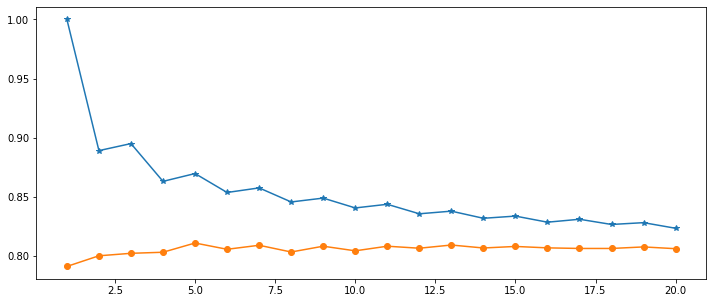

In [312]:
plt.figure(figsize=(12,5))
plt.plot(range(1,21),train_scores,marker='*',label='Train Score')
plt.plot(range(1,21),test_scores,marker='o',label='Test Score')

In [313]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(5)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.811

In [314]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
#confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,6961,708,7669
1,1182,1149,2331
All,8143,1857,10000


In [315]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      7669
           1       0.62      0.49      0.55      2331

    accuracy                           0.81     10000
   macro avg       0.74      0.70      0.71     10000
weighted avg       0.80      0.81      0.80     10000



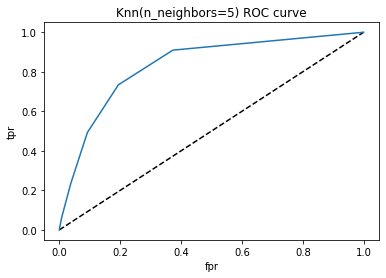

In [316]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=5) ROC curve')
plt.show()

In [317]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8325985673097421

In [318]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,25)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.8045
Best Parameters: {'n_neighbors': 9}


**NAIVE** **BAYES**

In [319]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix


In [320]:
# Initiating the Gaussian Classifier
mod = GaussianNB()

# Training your model 
mod.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [321]:
# Predicting Outcome 
predicted = mod.predict(X_test)

In [322]:
mod.score(X_test,y_test)

0.9984

In [323]:
# Confusion Matrix
y_pred = mod.predict(X_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[7657   12]
 [   4 2327]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7669
           1       0.99      1.00      1.00      2331

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



**Decision Tree**

In [324]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',max_depth=8, max_features=10, random_state=0)
dt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [325]:
y_pred = dt.predict(X_test)

In [326]:
from sklearn.metrics import classification_report, confusion_matrix  

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[7669    0]
 [   0 2331]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7669
           1       1.00      1.00      1.00      2331

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



**NN**

In [327]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier 
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [328]:
from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000,verbose=2)  
mlp.fit(X_train, y_train)  

Iteration 1, loss = 0.45464244
Iteration 2, loss = 0.10231649
Iteration 3, loss = 0.03116046
Iteration 4, loss = 0.01082394
Iteration 5, loss = 0.00483965
Iteration 6, loss = 0.00271817
Iteration 7, loss = 0.00165552
Iteration 8, loss = 0.00114694
Iteration 9, loss = 0.00082801
Iteration 10, loss = 0.00063695
Iteration 11, loss = 0.00049859
Iteration 12, loss = 0.00039403
Iteration 13, loss = 0.00030767
Iteration 14, loss = 0.00024444
Iteration 15, loss = 0.00019869
Iteration 16, loss = 0.00016422
Iteration 17, loss = 0.00013892
Iteration 18, loss = 0.00011821
Iteration 19, loss = 0.00010182
Iteration 20, loss = 0.00008851
Iteration 21, loss = 0.00007759
Iteration 22, loss = 0.00006844
Iteration 23, loss = 0.00006065
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=2, warm_start=False)

In [329]:
predictions = mlp.predict(X_test)

from sklearn import metrics 
print("Accuracy", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

Accuracy 1.0
[[7669    0]
 [   0 2331]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7669
           1       1.00      1.00      1.00      2331

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [330]:
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [331]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib 
import pandas as pd
import numpy as np

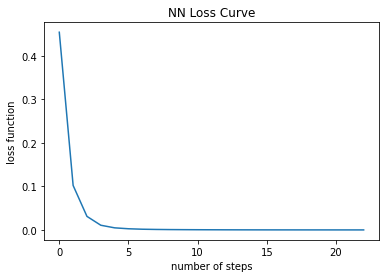

In [332]:
plt.plot(mlp.loss_curve_)
plt.title("NN Loss Curve")
plt.xlabel("number of steps")
plt.ylabel("loss function")
plt.show()

In [333]:
(mlp.intercepts_[0]).shape

(10,)

In [334]:
(mlp.coefs_[0]).shape

(18, 10)

In [335]:
mlp.intercepts_[0]

array([-0.22056505,  0.48330979,  1.46833593,  0.04149313, -0.0627402 ,
        0.01670083, -0.15483994,  0.5752247 , -0.01029413,  0.3622246 ])

In [336]:
mlp.coefs_[0]

array([[-0.27422797,  0.32376457,  0.25196425,  0.06478   ,  0.50106474,
         0.03951757, -0.29633445,  0.10021833, -0.38573067, -0.16178036],
       [-0.50611374, -0.05460495,  0.15454552,  0.01520879,  0.72652615,
        -0.30062357, -0.17763786,  0.10066113,  0.3225788 , -0.27477104],
       [ 0.15875204, -0.68808529, -0.86640604,  0.96777419,  0.51345885,
        -0.43400401,  0.47137541,  0.82843983, -0.64837946,  0.15775207],
       [-0.03371788, -0.44455833, -0.03176092, -0.10988816,  0.40510604,
        -0.20993676, -0.01972549, -0.14834475,  0.24353146, -0.26166544],
       [ 0.015438  , -0.07523812,  0.0678514 ,  0.30338811,  0.0328137 ,
         0.16763482,  0.40298994, -0.21438693,  0.21568133, -0.01402054],
       [-0.11062154, -0.45537224,  0.03638299,  0.11264348, -0.1300718 ,
        -0.49681032, -0.09530688, -0.00182824,  0.25667051, -0.62116557],
       [-0.02497114, -0.52558418,  0.18633599,  0.32900828,  0.26424845,
        -0.07517577, -0.13941365, -0.26687118

In [337]:
#Adjust the number of hidde Layer/ hidden node to improve the NN performance. Write your code below.

mlp = MLPClassifier(hidden_layer_sizes=(5,5), max_iter=1000,verbose=2)  
mlp.fit(X_train, y_train) 

predictions = mlp.predict(X_test)  

Iteration 1, loss = 0.75650632
Iteration 2, loss = 0.34721417
Iteration 3, loss = 0.13672630
Iteration 4, loss = 0.06515557
Iteration 5, loss = 0.03458041
Iteration 6, loss = 0.01998345
Iteration 7, loss = 0.01252789
Iteration 8, loss = 0.00843665
Iteration 9, loss = 0.00595945
Iteration 10, loss = 0.00432409
Iteration 11, loss = 0.00319973
Iteration 12, loss = 0.00238627
Iteration 13, loss = 0.00182506
Iteration 14, loss = 0.00140278
Iteration 15, loss = 0.00107252
Iteration 16, loss = 0.00081870
Iteration 17, loss = 0.00064971
Iteration 18, loss = 0.00053170
Iteration 19, loss = 0.00043936
Iteration 20, loss = 0.00036709
Iteration 21, loss = 0.00030937
Iteration 22, loss = 0.00026286
Iteration 23, loss = 0.00022440
Iteration 24, loss = 0.00019281
Iteration 25, loss = 0.00016656
Iteration 26, loss = 0.00014475
Iteration 27, loss = 0.00012622
Iteration 28, loss = 0.00011043
Iteration 29, loss = 0.00010695
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. S

In [338]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
print("Accuracy", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))

Accuracy 0.9999
[[7669    0]
 [   1 2330]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7669
           1       1.00      1.00      1.00      2331

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



**Logistic** **Regression**

In [339]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=0.01, max_iter=10000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 1.000
Test set score: 1.000


In [340]:
logreg.intercept_.T

array([-3.35900793])

In [341]:
logreg.coef_.T

array([[ 7.30803036e-03],
       [ 7.26931621e-01],
       [ 3.17536022e+00],
       [ 3.52692842e-01],
       [ 1.42472737e-01],
       [ 2.63181931e-01],
       [ 3.75061623e-01],
       [ 2.00845689e-02],
       [-7.21014795e-03],
       [ 1.92452150e-02],
       [-6.55567316e-02],
       [ 1.78184559e-02],
       [-2.85372770e-02],
       [-2.54788522e-03],
       [ 4.85845700e-02],
       [-1.00632570e-01],
       [-2.06514098e-01],
       [ 3.91067944e-02]])

In [342]:
print(y_test)

11841    0
19602    1
45519    0
25747    0
42642    0
        ..
25091    0
27853    0
47278    0
37020    0
2217     0
Name: low-cholesterol, Length: 10000, dtype: int64


In [343]:
from sklearn.metrics import classification_report, confusion_matrix  
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
##before processing data in PCA, we got 0.73 accurancy, from this we can observe the accurancy do not decrease a lot
#we can also normally use the model, and largely reduce caculation by using PCA

[[7669    0]
 [   0 2331]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7669
           1       1.00      1.00      1.00      2331

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [344]:
#!conda install -c conda-forge scikit-plot
import matplotlib.pyplot as plt
import scikitplot as skplt
y_pred_probas = logreg.predict_proba(X_test)

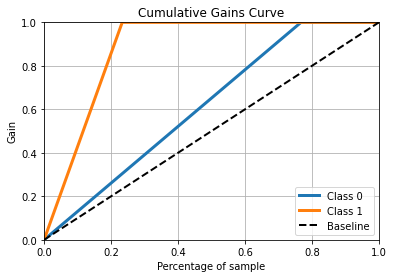

In [345]:
skplt.metrics.plot_cumulative_gain(y_test, y_pred_probas)
plt.show()

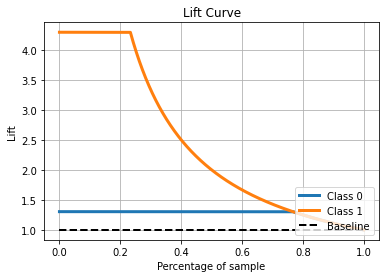

In [346]:
skplt.metrics.plot_lift_curve(y_test, y_pred_probas)
plt.show()